In [1]:
%matplotlib ipympl

In [2]:
import mpl_interactions.ipyplot as iplt

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from matplotlib.widgets import Slider

In [5]:
# Here we will generate some mock data to test the echelle diagram
mockfr = np.array([1.0, 2.2, 3.4, 4.6, 5.8, 7.0, 8.2])
mocksnr = np.array([10, 20, 15, 25, 30, 35, 40])

# Sorting the frequencies
mockfr = np.sort(mockfr)

# Calculate the spacing between consecutive frequencies
mocksp = np.diff(mockfr)

# Calculate the median spacing 
median_mocksp = np.median(mocksp)

print("First estimate of dnu is", median_mocksp)

First estimate of dnu is 1.2


Text(0.5, 1.0, 'Echelle Diagram')

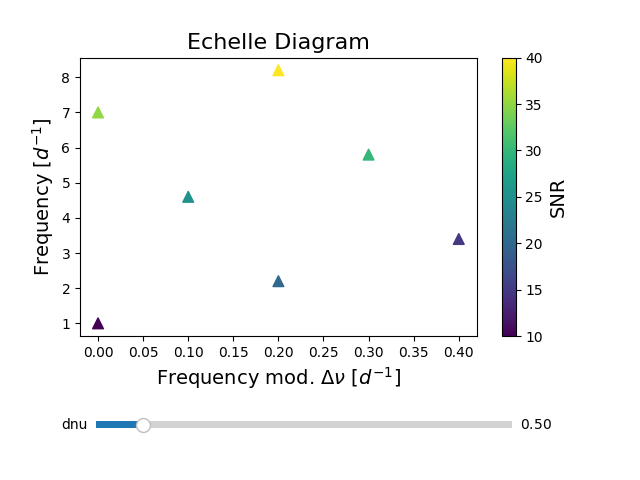

In [6]:
#mockdnu = np.linspace(0.05, 4.05, 800)

# define the function modulus dnu
def mockfun(mockdnu, **kwargs):
    return mockfr % mockdnu

# Plot the echelle diagram
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=.3)

axdnu = plt.axes([0.15, 0.1, 0.65, 0.03])
slider = Slider(axdnu, label='dnu', valmin=.05, valmax = 4.05, valstep=0.005)
controls = iplt.scatter(
    mockfun,
    mockfr,
    mockdnu=slider, 
    use_ipywidgets=False, 
    c=mocksnr, 
    cmap='viridis', 
    s=60, 
    ylim="auto",
    marker='^',
    ax=ax)
                     
plt.colorbar().set_label(label='SNR', size=14)
ax.set_xlabel(r'Frequency mod. $\Delta \nu$ [$d^{-1}$]', fontsize=14)
ax.set_ylabel(r'Frequency [$d^{-1}$]', fontsize=14)
ax.set_title('Echelle Diagram', fontsize=16)
#plt.grid(True)
#fig.tight_layout()

In [7]:
freqs = np.loadtxt('freqcol_TIC174899989.dat')
snr = np.loadtxt('SNR_TIC17489989.dat')

In [8]:
# Upper and lower limits for the frequency list
llim = 20.0
ulim = 50.0
freqind = (freqs > llim) & (freqs<ulim)

In [9]:
freqs = freqs[ freqind ]
snr = snr[ freqind ]

# Calculate the spacing between consecutive frequencies
sp = np.diff(freqs)

# Calculate the median spacing 
median_sp = np.median(sp)

print("First estimate of dnu is", median_sp)

First estimate of dnu is 0.35504991481000303


In [11]:
dnu = np.linspace(0.05, 9.05, 900)

In [12]:
# define the function modulus dnu
def fun(dnu, **kwargs):
    return freqs % dnu

Text(0.5, 1.0, 'Echelle Diagram')

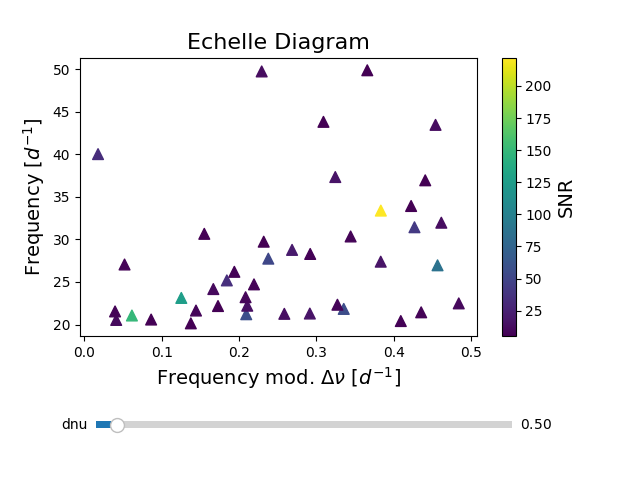

In [16]:
# Plot the echelle diagram
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=.3)

axdnu = plt.axes([0.15, 0.1, 0.65, 0.03])
slider = Slider(axdnu, label='dnu', valmin=.05, valmax = 9.05, valstep=0.005)
controls = iplt.scatter(
    fun,
    freqs,
    dnu=slider, 
    use_ipywidgets=False, 
    c=snr, 
    cmap='viridis', 
    s=60, 
    ylim="auto",
    marker='^',
    ax=ax)
                     
plt.colorbar().set_label(label='SNR', size=14)
ax.set_xlabel(r'Frequency mod. $\Delta \nu$ [$d^{-1}$]', fontsize=14)
ax.set_ylabel(r'Frequency [$d^{-1}$]', fontsize=14)
ax.set_title('Echelle Diagram', fontsize=16)
#plt.grid(True)
#fig.tight_layout()